<a href="https://colab.research.google.com/github/nada-mah/arabic-sentiment-analysis/blob/master/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARABIC SENTIMENT ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import WhitespaceTokenizer
import nltk
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## download dataset from kaggle

In [3]:
! pip install -q kaggle
import os
from google.colab import files
print("Upload kaggle.json here")
files.upload()

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

dataset_name = 'mksaad/arabic-sentiment-twitter-corpus'
zip_name = dataset_name.split('/')[-1]

!kaggle datasets download -d {dataset_name}
!unzip -q ./{zip_name}.zip -d .


Upload kaggle.json here


Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory
 53% 9.00M/16.9M [00:00<00:00, 29.4MB/s]
100% 16.9M/16.9M [00:00<00:00, 51.3MB/s]


In [4]:
path="./train_Arabic_tweets_positive_20190413.tsv"
trainpos_df=pd.read_csv(path, sep = '\t', header = None)
print(trainpos_df.shape)
path="./train_Arabic_tweets_negative_20190413.tsv"
trainneg_df=pd.read_csv(path, sep = '\t', header = None)
print(trainneg_df.shape)
path="./test_Arabic_tweets_positive_20190413.tsv"
testpos_df=pd.read_csv(path, sep = '\t', header = None)
print(testpos_df.shape)
path="./test_Arabic_tweets_negative_20190413.tsv"
testneg_df=pd.read_csv(path, sep = '\t', header = None)
print(testneg_df.shape)

(22761, 2)
(22514, 2)
(5752, 2)
(5768, 2)


see the data column

In [5]:
trainpos_df.head()

,0,1
0,pos,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1,pos,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
2,pos,من الخير نفسه 💛
3,pos,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
4,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...


In [6]:
trainneg_df.head()

,0,1
0,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
3,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
4,neg,الدودو جايه تكمل علي 💔


In [7]:
testpos_df.head()

,0,1
0,pos,#الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران...
1,pos,صباحك خيرات ومسرات 🌸
2,pos,#تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...
3,pos,😂😂 يا جدعان الرجاله اللي فوق ال دول خطر ع تويت...
4,pos,رساله صباحيه : 💛 اللهم اسألك التوفيق في جميع ا...


In [8]:
testneg_df.head()

,0,1
0,neg,حتى الايتونز خربتوه مو صاحين انتو؟؟ 😭
1,neg,واحد تبع النظام السوري يقول أن المخابرات السور...
2,neg,الى متى التعامل السئ للخادمات وعدم احترامهم وك...
3,neg,رايح جاي ي طحلبي 🐸 #الهلال_الاهلي
4,neg,تتمغط ومعها سداع 😫


## DATA VISUILIZATION

In [9]:
trainneg_df[0].replace('neg',0 ,inplace= True)
trainpos_df[0].replace('pos',1 ,inplace= True)
testpos_df[0].replace('pos',1 ,inplace= True)
testneg_df[0].replace('neg',0 ,inplace= True)

In [10]:
traindf = pd.DataFrame()
x = [trainpos_df,trainneg_df]
traindf=pd.concat(x)
type(traindf)

pandas.core.frame.DataFrame

In [11]:
testdf = pd.DataFrame()
x = [testpos_df,testneg_df]
testdf=pd.concat(x)
type(testdf)

pandas.core.frame.DataFrame

In [12]:
def checknullanddup(df):
        if df.isna().sum().all() > 0 :
            print('droping null values')
            df.dropna(inplace = True)
        if df.duplicated().sum() >= 1:
            print('droping duplicate values')
            df.drop_duplicates(inplace = True)
checknullanddup(traindf)
checknullanddup(testdf)

droping duplicate values
droping duplicate values


In [13]:
traindf.rename(columns = {0:'sentiment'}, inplace = True)
traindf.rename(columns = {1:"tweets"}, inplace = True)
testdf.rename(columns = {0:'sentiment'}, inplace = True)
testdf.rename(columns = {1:"tweets"}, inplace = True)

[]

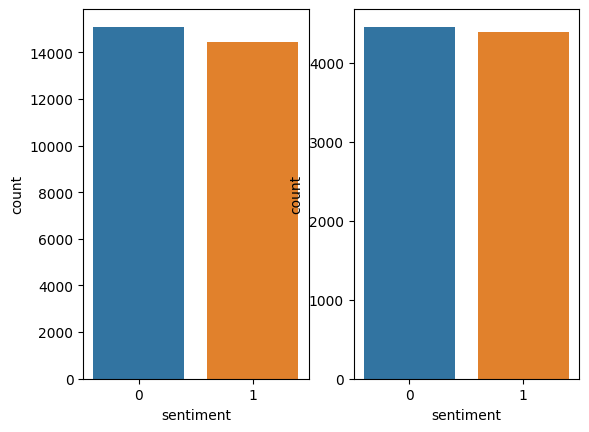

In [14]:
import seaborn as sns

plt.subplot(1, 2, 1)
ax = sns.countplot(data=traindf,x='sentiment')
plot_size = plt.rcParams["figure.figsize"]
plot_size[0] =10
plot_size[1] = 4
ax.plot()
plt.subplot(1, 2, 2)
plot_size = plt.rcParams["figure.figsize"]
plot_size[0] =10
plot_size[1] = 4
plt.rcParams["figure.figsize"] = plot_size
ax = sns.countplot(data=testdf,x='sentiment')
ax.plot()


10.0
4.0
8.0
6.0


<Axes: ylabel='sentiment'>

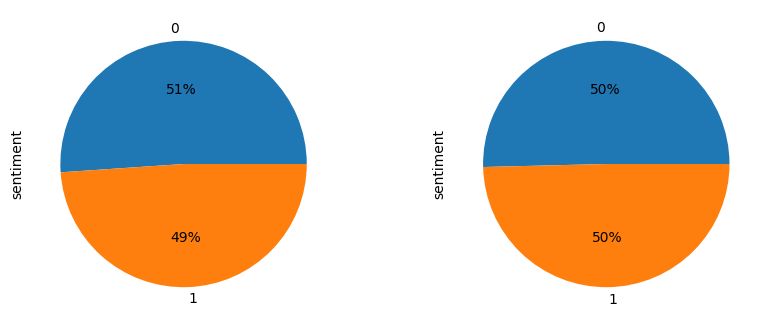

In [15]:
plt.subplot(1, 2, 1)
plot_size = plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

traindf['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.subplot(1, 2, 2)
plot_size = plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

testdf['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

## PREPROCESSING

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
tk = WhitespaceTokenizer()
from nltk.stem.isri import ISRIStemmer
st = ISRIStemmer()
from nltk.corpus import stopwords
stopwords_list = stopwords.words('arabic')


In [18]:
def clean(df):
     x = df
     x = re.sub(r"https\S+|www\S+|http\S+", '', x, flags = re.MULTILINE)
     x = re.sub(r'\@\S+|\#', '', x)
     # x = re.sub(r'[^\w\s]','',x)
     myre = re.compile(u'[\u064B-\u0652\u06D4\u0670\u0674\u06D5-\u06ED]+',
                      re.UNICODE)
     x = re.sub(r'[\u0021-\u003F]+','',x)
     x = re.sub(r'\u200b','',x)
     x = myre.sub('', x)
     return(x)

In [19]:
def tokinize(df):
    tokens = tk.tokenize(df)
    return(tokens)
def stemming(df):
    stem =[]
    for a in df:
        stem.append(st.stem(a))
    return' '.join(stem)
# def stemming(df):
#     stem =[]
#     for a in df:
#         stem.append(st.stem(a))
#     return(stem)
def rmvStopwords(df):
    out = []
    for i in df :
        if i not in stopwords_list:
            out.append(i)
    return(out)

In [20]:
traindf['prepo'] = traindf.apply(lambda x: clean(x["tweets"]),axis=1)
traindf.shape
testdf['prepo'] = testdf.apply(lambda x: clean(x["tweets"]),axis=1)
testdf.shape

(8841, 3)

In [21]:
traindf.head()


,sentiment,tweets,prepo
0,1,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1,1,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...,وفي النهاية لن يبقى معك آحدإلا من رأى الجمال ف...
2,1,من الخير نفسه 💛,من الخير نفسه 💛
3,1,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...,زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترضى...
4,1,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...,الشيء الوحيد الذي وصلوا فيه للعالمية هو المسي...


In [22]:
traindf['prepo'] = traindf.apply(lambda x: tokinize(x['prepo']),axis=1)
traindf.shape
testdf['prepo'] = testdf.apply(lambda x: tokinize(x['prepo']),axis=1)
testdf.shape

(8841, 3)

In [23]:
traindf.head()


,sentiment,tweets,prepo
0,1,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...,"[نحن, الذين, يتحول, كل, ما, نود, أن, نقوله, إل..."
1,1,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...,"[وفي, النهاية, لن, يبقى, معك, آحدإلا, من, رأى,..."
2,1,من الخير نفسه 💛,"[من, الخير, نفسه, 💛]"
3,1,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...,"[زلزل_الملعب_نصرنا_بيلعب, كن, عالي, الهمه, ولا..."
4,1,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...,"[الشيء, الوحيد, الذي, وصلوا, فيه, للعالمية, هو..."


In [24]:
traindf['prepo'] = traindf.apply(lambda x: rmvStopwords(x['prepo']), axis=1)
traindf.shape
testdf['prepo'] = testdf.apply(lambda x: rmvStopwords(x['prepo']), axis=1)
testdf.shape

(8841, 3)

In [25]:
traindf.head()


,sentiment,tweets,prepo
0,1,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...,"[يتحول, نود, نقوله, دعاء, لله،, تبحثوا, فينا, ..."
1,1,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...,"[وفي, النهاية, يبقى, معك, آحدإلا, الجمال, روحك..."
2,1,من الخير نفسه 💛,"[الخير, نفسه, 💛]"
3,1,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...,"[زلزل_الملعب_نصرنا_بيلعب, عالي, الهمه, ترضى, ب..."
4,1,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...,"[الشيء, الوحيد, وصلوا, للعالمية, المسيار, ترى,..."


In [26]:
traindf['prepo'] = traindf.apply(lambda x: stemming(x['prepo']), axis=1)
traindf.shape
testdf['prepo'] = testdf.apply(lambda x: stemming(x['prepo']), axis=1)
testdf.shape

(8841, 3)

In [27]:
traindf.head(200)

,sentiment,tweets,prepo
0,1,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...,تحل نود نقل دعء له، بحث فين قوة، انن مكسورون، ...
1,1,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...,وفي نهي بقى معك حدإل جمل روح اماالمنبهر ظا…
2,1,من الخير نفسه 💛,خير نفس 💛
3,1,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...,زلزل_الملعب_نصرنا_بيلعب علي همه رضى بغر قمه جر...
4,1,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...,شيء وحد وصل علم سير ترى كان شجع درد ضد نصر 🤣
...,...,...,...
203,1,الف مبروك والفال لك يابو فلاح 💙,الف برك فال يبو فلح 💙
204,1,هو الوحيد اغلي مافي الحياه.. ملايين بتقول أنصر...,وحد اغل افي حيه لاي تقل صره يلل 🙏🦅 قدها__يا__ا...
205,1,#النصر_الهلال مستعدين ؟ الف ريال ستوزع على الم...,نصر_الهلال سعد ؟ الف وزع فاعل ، برا هلل نصر ان...
206,1,"⇟♩ღ✺ دعاء ذا النون يصنع المعجزات 💛 : ""لا إله إ...",⇟♩ღ✺ دعء نون صنع عجز 💛 اله سبح اني كنت ظلم 🕊 💌...


## Vocabulary Corpus


In [28]:
x_train=traindf['prepo']
x_train.shape
x_test=testdf['prepo']
x_test.shape

(8841,)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features=2100, min_df=7, max_df=0.8)

In [30]:
y_train = traindf['sentiment']
y_train.to_numpy()
y_test = testdf['sentiment']
y_test.to_numpy()


array([1, 1, 1, ..., 0, 0, 0])

## linear svm

In [61]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
classifier = LinearSVC()
pipelinelsvm = Pipeline([('tfidf',vec), ('clf',classifier)])
pipelinelsvm.fit(x_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, max_features=2100, min_df=7)),
                ('clf', LinearSVC())])

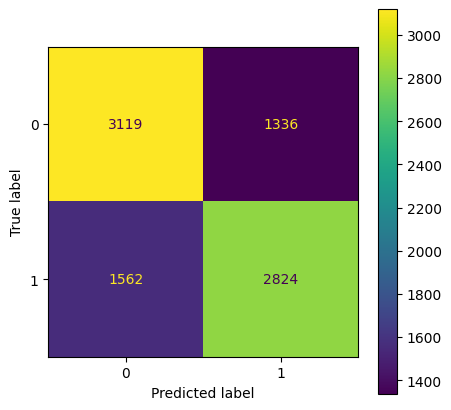

In [62]:
y_pred = pipelinelsvm.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cf_matrix).plot()

[]

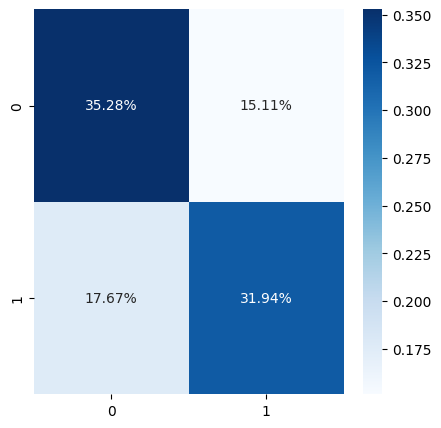

In [63]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues').plot()


In [64]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      4455
           1       0.68      0.64      0.66      4386

    accuracy                           0.67      8841
   macro avg       0.67      0.67      0.67      8841
weighted avg       0.67      0.67      0.67      8841

0.672209026128266


In [65]:
prediction = pipelinelsvm.predict(["أنا سعيد للغاية"])
if prediction == 1:
  print("Result: This review is positive")
else:
  print("Result: This review is negative")

Result: This review is negative


## nonlinear svm

In [53]:
from sklearn.svm import NuSVC
classifier = NuSVC()
pipelineNlsvm = Pipeline([('tfidf',vec), ('clf',classifier)])
pipelineNlsvm.fit(x_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, max_features=2100, min_df=7)),
                ('clf', NuSVC())])

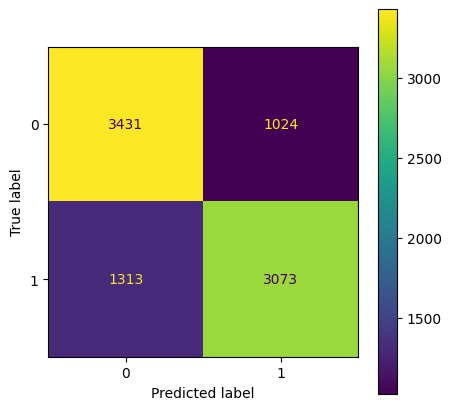

In [54]:
y_pred = pipelineNlsvm.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cf_matrix).plot()

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75      4455
           1       0.75      0.70      0.72      4386

    accuracy                           0.74      8841
   macro avg       0.74      0.74      0.74      8841
weighted avg       0.74      0.74      0.74      8841

0.7356633864947404


[]

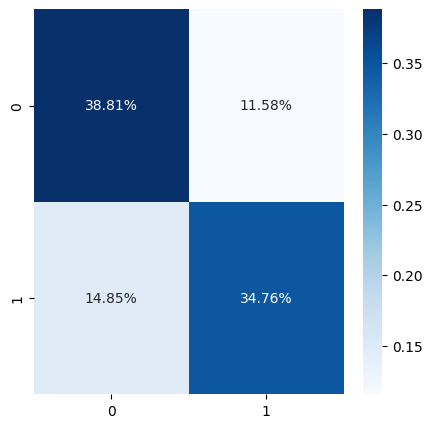

In [56]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues').plot()


## Multinomial Naive Bayes

In [57]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
pipelineMNB = Pipeline([('tfidf',vec), ('clf',classifier)])
pipelineMNB.fit(x_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, max_features=2100, min_df=7)),
                ('clf', MultinomialNB())])

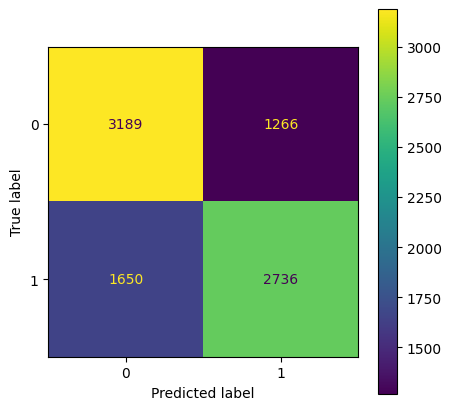

In [58]:
y_pred = pipelineMNB.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cf_matrix).plot()

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      4455
           1       0.68      0.62      0.65      4386

    accuracy                           0.67      8841
   macro avg       0.67      0.67      0.67      8841
weighted avg       0.67      0.67      0.67      8841

0.670173057346454


[]

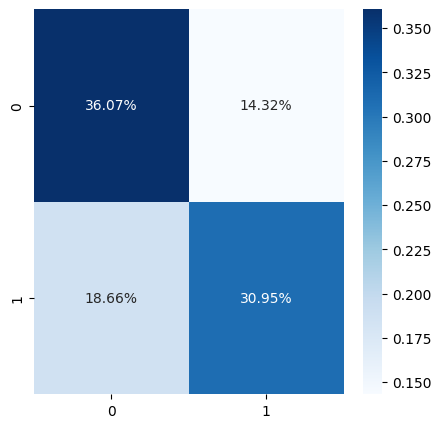

In [60]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues').plot()


##  Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=70, random_state=0)
pipelineRFC = Pipeline([('tfidf',vec), ('clf',classifier)])
pipelineRFC.fit(x_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, max_features=2100, min_df=7)),
                ('clf', RandomForestClassifier(max_depth=70, random_state=0))])

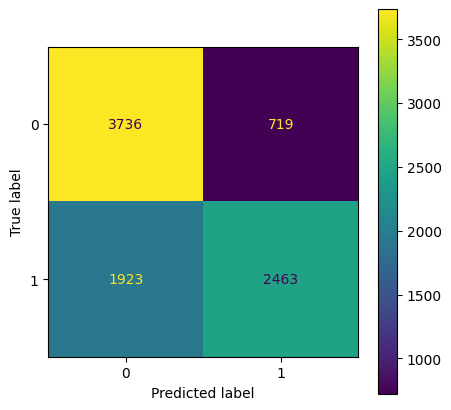

In [83]:
y_pred = pipelineRFC.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cf_matrix).plot()

In [84]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.84      0.74      4455
           1       0.77      0.56      0.65      4386

    accuracy                           0.70      8841
   macro avg       0.72      0.70      0.69      8841
weighted avg       0.72      0.70      0.70      8841

0.7011650265807036


[]

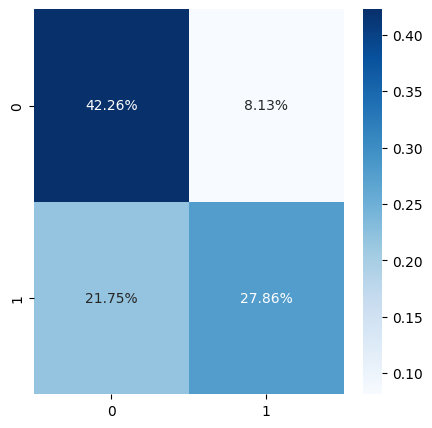

In [85]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues').plot()


## ~artificial neural networks (ANN)~ (incomplete)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
pipelineMNB = Pipeline([('tfidf',vec), ('clf',classifier)])
pipelineMNB.fit(x_train, y_train)

In [ ]:
y_pred = pipelineMNB.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cf_matrix).plot()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues').plot()


## Model Serialization

In [ ]:
import joblib
joblib.dump(pipelineNlsvm,'SentimentAnalysis_Model_Pipeline.pkl')

['SentimentAnalysis_Model_Pipeline.pkl']

In [ ]:
joblib.__version__

'1.3.2'

In [ ]:
model = joblib.load('SentimentAnalysis_Model_Pipeline.pkl')

In [ ]:
print(model.predict(["😂😂 يا جدعان الرجاله اللي فوق ال دول خطرع "]))

[1]
